# Дообучение модели YOLO

In [1]:
import pandas as pd
import os
import pandas as pd
import matplotlib.pyplot as plt

## Скачиваем веса предобученой модели 'YOLOv8x-cls' для задачи классификации и дообучиваем на нашем датасете

In [2]:
from ultralytics import YOLO

model = YOLO('yolov8x-cls.pt') 

model.train(data='/Users/muzafarov/Desktop/MyEducation/Interview/Kontur/dataset_AI', epochs=30, imgsz=640)


New https://pypi.org/project/ultralytics/8.1.47 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.222 🚀 Python-3.10.13 torch-2.1.1 CPU (Apple M1)
engine/trainer: task=classify, mode=train, model=yolov8n-cls.pt, data=/Users/muzafarov/Desktop/MyEducation/Interview/Kontur/dataset_AI, epochs=15, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train4, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, show=False, save_frames=False, save

train: Scanning /Users/muzafarov/Desktop/MyEducation/Interview/Kontur/dataset_AI/train... 19427 images, 0 corrupt: 100%|██████████| 19427/19427 [00:02<00:00, 9059.23it/s] 

train: New cache created: /Users/muzafarov/Desktop/MyEducation/Interview/Kontur/dataset_AI/train.cache



val: Scanning /Users/muzafarov/Desktop/MyEducation/Interview/Kontur/dataset_AI/val... 203 images, 0 corrupt: 100%|██████████| 203/203 [00:00<?, ?it/s]

optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 26 weight(decay=0.0), 27 weight(decay=0.0005), 27 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/classify/train4
Starting training for 15 epochs...

      Epoch    GPU_mem       loss  Instances       Size



       1/15         0G     0.7692         16        640:   4%|▍         | 51/1215 [02:51<1:05:09,  3.36s/it]


KeyboardInterrupt: 

## Теперь в папке runs/train/weights лежат веса дообученной модели
## Загрузка весов дообученной модели

In [75]:
from ultralytics import YOLO

import numpy as np


model = YOLO('/Users/muzafarov/Desktop/MyEducation/Interview/Kontur/runs/classify/train3/weights/best.pt')  

## Пробуем предсказать одну картинку

In [76]:
results = model('/Users/muzafarov/Desktop/MyEducation/Interview/Kontur/images/fTjaitgAJa.jpg') 


image 1/1 /Users/muzafarov/Desktop/MyEducation/Interview/Kontur/images/fTjaitgAJa.jpg: 640x640 1 1.00, 0 0.00, 57.6ms
Speed: 3.4ms preprocess, 57.6ms inference, 0.3ms postprocess per image at shape (1, 3, 640, 640)


In [77]:
test_data = pd.read_csv('test.csv')
test_data.head(3)

,id
0,Qt1fGUB0Vz.jpeg
1,j4Rhioq7R3.jpeg
2,rD0hgFHJUZ.jpeg


In [78]:
test_jpg = pd.read_csv('test_jpg.csv')
test_jpg.head(3)

,id
0,Qt1fGUB0Vz.jpg
1,j4Rhioq7R3.jpg
2,rD0hgFHJUZ.jpg


## Получаем предсказания по всему тестовому набору и добавляем в список target

In [79]:
target = []
for i in range(len(test_jpg)):
    results = model(f'/Users/muzafarov/Desktop/MyEducation/Interview/Kontur/images/{test_jpg.id[i]}')
    target.append(results[0].probs.data.tolist()[1])
    


image 1/1 /Users/muzafarov/Desktop/MyEducation/Interview/Kontur/images/Qt1fGUB0Vz.jpg: 640x640 0 1.00, 1 0.00, 57.7ms
Speed: 4.3ms preprocess, 57.7ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /Users/muzafarov/Desktop/MyEducation/Interview/Kontur/images/j4Rhioq7R3.jpg: 640x640 0 0.94, 1 0.06, 41.4ms
Speed: 2.0ms preprocess, 41.4ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /Users/muzafarov/Desktop/MyEducation/Interview/Kontur/images/rD0hgFHJUZ.jpg: 640x640 0 1.00, 1 0.00, 52.7ms
Speed: 2.2ms preprocess, 52.7ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /Users/muzafarov/Desktop/MyEducation/Interview/Kontur/images/aY5z1EJsJ6.jpg: 640x640 1 1.00, 0 0.00, 40.8ms
Speed: 2.5ms preprocess, 40.8ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /Users/muzafarov/Desktop/MyEducation/Interview/Kontur/images/qZ3IoxD2TE.jpg: 640x640 0 1.00, 1 0.00, 38.3ms
Speed: 2.1ms prep

## Вставляем столбец target в тестовую таблицу

In [80]:
test_data.insert(1, "target", target)
test_data

,id,target
0,Qt1fGUB0Vz.jpeg,2.300007e-08
1,j4Rhioq7R3.jpeg,5.637110e-02
2,rD0hgFHJUZ.jpeg,1.251155e-07
3,aY5z1EJsJ6.jpeg,9.999957e-01
4,qZ3IoxD2TE.jpeg,2.262039e-05
...,...,...
501,Qrme6EUmL1,9.999980e-01
502,4369Dl8wfs.jpeg,2.402230e-09
503,BrNEvRNpPu.jpeg,7.246727e-06
504,DuwXCNmeMx.webp,1.732988e-02


## Сохраняем итоговую таблицу в формате csv

In [81]:
test_data.to_csv('submit_yolo_15.csv', index=False)

## Графики метрик

In [111]:
results_csv = pd.read_csv('runs/classify/train3/results.csv')
results_csv.head(3)

,epoch,train/loss,metrics/accuracy_top1,metrics/accuracy_top5,val/loss,lr/pg0,lr/pg1,lr/pg2
0,1,0.44162,0.92611,1,0.44654,0.000233,0.000233,0.000233
1,2,0.11785,0.91626,1,0.39119,0.000440,0.000440,0.000440
2,3,0.08203,0.97537,1,0.35972,0.000616,0.000616,0.000616


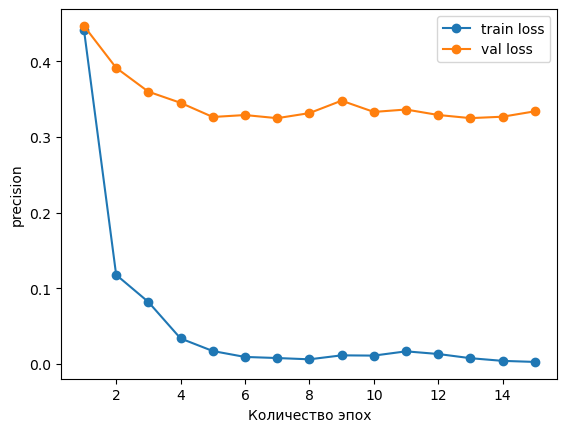

In [110]:
%matplotlib inline

# Данные для первого источника
x_values1 = results_csv['                  epoch']
y_values1 = results_csv['             train/loss']

# Данные для второго источника
x_values2 = results_csv['                  epoch']
y_values2 = results_csv['               val/loss']

# Построение линейного графика для первого источника
plt.plot(x_values1, y_values1, label='train loss', marker='o')

# Построение линейного графика для второго источника
plt.plot(x_values2, y_values2, label='val loss', marker='o')

# Добавление заголовка и меток осей
# plt.title('Сравнение моделей')
plt.xlabel('Количество эпох')
plt.ylabel('precision')

# Добавление легенды
plt.legend()

# Сохранение графика
# plt.savefig('/Users/muzafarov/Desktop/MyEducation/DeepLearningInPractice/itmo_deep_learning_in_practice/img/precision.png', format='png')

# Отображение графика
plt.show()

In [71]:
results

,epoch,train/loss,metrics/accuracy_top1,metrics/accuracy_top5,val/loss,lr/pg0,lr/pg1,lr/pg2
0,1,0.44162,0.92611,1,0.44654,0.000233,0.000233,0.000233
1,2,0.12082,0.92611,1,0.38953,0.000394,0.000394,0.000394
2,3,0.07058,0.97537,1,0.34440,0.000475,0.000475,0.000475
3,4,0.02537,0.98030,1,0.33377,0.000361,0.000361,0.000361
4,5,0.01681,0.99015,1,0.33126,0.000361,0.000361,0.000361
5,6,0.01550,0.99015,1,0.32923,0.000243,0.000243,0.000243
